In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
device = torch.device('cuda') if (torch.cuda.is_available()) else torch.device('cpu')
device

device(type='cuda')

In [2]:
# complete = pd.read_csv('EOF_Bath_SPacific.csv')
complete = pd.read_csv('/kaggle/input/spacific2/Full_SPacific2.csv')
complete

,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,nlat,...,prev3_ts5,prev3_ts6,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2
0,10,0.0,1901058.0,337.0,2017.0,3.0,4.0,-49.54480,159.74740,-49.02560,...,-0.646798,0.461585,0.246950,-0.078740,-0.29560,-0.14310,0.053500,1.000000,0.277969,-1.0
1,11,0.0,1901058.0,360.0,2017.0,10.0,20.0,-47.99040,163.53390,-47.47610,...,-0.364070,0.543888,0.226426,0.262563,-0.21630,-0.74170,-0.151312,1.000000,0.225017,-1.0
2,12,0.0,1901058.0,361.0,2017.0,10.0,30.0,-47.47610,164.11070,-47.34380,...,-0.374211,0.566200,0.047431,0.412140,0.00830,-0.31370,-0.179385,-1.000000,-0.652355,-1.0
3,13,0.0,1901058.0,362.0,2017.0,11.0,9.0,-47.34380,163.28210,-47.06080,...,-0.453763,0.278568,0.342156,0.049035,-0.17350,-0.29850,-0.835740,-1.000000,0.262931,-1.0
4,14,0.0,1901058.0,363.0,2017.0,11.0,19.0,-47.06080,163.90690,-46.28460,...,-0.515990,0.227485,0.321838,0.073723,0.51430,0.57680,-0.477094,-1.000000,-0.314455,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23789,49949,6.0,5905758.0,129.0,2021.0,6.0,28.0,-25.87120,-169.45827,-25.73960,...,-0.186269,0.925323,0.141928,0.655128,0.06410,0.17480,0.855069,-1.000000,0.658408,-1.0
23790,49950,6.0,5905758.0,130.0,2021.0,7.0,8.0,-25.73960,-169.62787,-25.52322,...,-0.158385,1.245368,0.046514,0.524881,0.23322,-0.06032,0.994050,-1.000000,0.147252,-1.0
23791,49951,6.0,5905758.0,131.0,2021.0,7.0,18.0,-25.52322,-169.76749,-25.35153,...,-0.218372,0.270149,0.439434,-0.271951,0.19482,-0.19175,-1.000000,-0.386883,-0.006577,-1.0
23792,49952,6.0,5905758.0,132.0,2021.0,7.0,28.0,-25.35153,-169.75304,-25.28611,...,-0.235653,1.194011,0.363216,0.148110,0.13160,-0.16960,-1.000000,-0.109747,0.018768,-1.0


In [3]:
complete.head(50)

,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,nlat,...,prev3_ts5,prev3_ts6,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2
0,10,0.0,1901058.0,337.0,2017.0,3.0,4.0,-49.544800,159.747400,-49.025600,...,-0.646798,0.461585,0.246950,-0.078740,-0.295600,-0.143100,0.053500,1.000000,0.277969,-1.000000
1,11,0.0,1901058.0,360.0,2017.0,10.0,20.0,-47.990400,163.533900,-47.476100,...,-0.364070,0.543888,0.226426,0.262563,-0.216300,-0.741700,-0.151312,1.000000,0.225017,-1.000000
2,12,0.0,1901058.0,361.0,2017.0,10.0,30.0,-47.476100,164.110700,-47.343800,...,-0.374211,0.566200,0.047431,0.412140,0.008300,-0.313700,-0.179385,-1.000000,-0.652355,-1.000000
3,13,0.0,1901058.0,362.0,2017.0,11.0,9.0,-47.343800,163.282100,-47.060800,...,-0.453763,0.278568,0.342156,0.049035,-0.173500,-0.298500,-0.835740,-1.000000,0.262931,-1.000000
4,14,0.0,1901058.0,363.0,2017.0,11.0,19.0,-47.060800,163.906900,-46.284600,...,-0.515990,0.227485,0.321838,0.073723,0.514300,0.576800,-0.477094,-1.000000,-0.314455,1.000000
5,25,0.0,3901899.0,7.0,2017.0,3.0,25.0,-51.596188,148.015265,-52.024165,...,-0.731007,-0.206357,0.212009,0.114480,-0.511360,0.135757,0.132321,-1.000000,-1.000000,0.864763
6,26,0.0,3901899.0,8.0,2017.0,4.0,4.0,-52.024165,148.817030,-52.170643,...,-0.763272,-0.313148,0.267357,0.117725,-0.127028,0.097037,-0.117780,1.000000,-1.000000,-0.286737
7,27,0.0,3901899.0,9.0,2017.0,4.0,14.0,-52.170643,148.334168,-52.041425,...,-0.740887,-0.355803,0.185095,0.217001,-0.039250,0.065555,0.431393,-1.000000,-0.958478,-1.000000
8,28,0.0,3901899.0,10.0,2017.0,4.0,24.0,-52.041425,149.168813,-51.208210,...,-0.707933,-0.047359,0.213467,0.174404,-0.427977,0.801765,1.000000,0.939079,-1.000000,0.884045
9,29,0.0,3901899.0,11.0,2017.0,5.0,4.0,-51.208210,150.363120,-50.274747,...,-0.655018,-0.152436,0.188803,0.139657,-0.146478,-0.482862,-0.034384,1.000000,-0.244116,1.000000


In [14]:
data = complete
data = data.assign(total_disp=np.sqrt(dx**2 + dy**2))
data = data[data.get('total_disp') < 1]
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.5441561502408879, 0.5448375881434677)

In [15]:
# chosen_params = ['bath1', 'bath2', 'prev_dy', 'prev_dx', 'dy', 'dx']
chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8',
  'prev_ts1', 'prev_ts2', 'prev_ts3', 'prev_ts4', 'prev_ts5', 'prev_ts6',
  'prev_ts7', 'prev_ts8','prev2_ts1', 'prev2_ts2', 'prev2_ts3', 'prev2_ts4', 'prev2_ts5', 'prev2_ts6',
  'prev2_ts7', 'prev2_ts8','prev3_ts1', 'prev3_ts2', 'prev3_ts3', 'prev3_ts4', 'prev3_ts5', 'prev3_ts6',
  'prev3_ts7', 'prev3_ts8', 'bath1', 'bath2', 'ssh1', 'ssh2', 'prev_dy', 'prev_dx', 'prev2_dy', 'prev2_dx',
                 'prev3_dy', 'prev3_dx', 'dy', 'dx']
# chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'prev_dy', 'prev_dx', 'dy', 'dx']
# chosen_params = ['prev_dy', 'prev_dx', 'dy', 'dx']
# chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'bath1', 'bath2', 'prev_dy', 'prev_dx', 'dy', 'dx']

final = data[chosen_params].dropna()
final

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,prev_ts1,prev_ts2,...,ssh1,ssh2,prev_dy,prev_dx,prev2_dy,prev2_dx,prev3_dy,prev3_dx,dy,dx
0,-0.886030,-4.008245,1.415758,-3.626434,-0.483417,0.410115,0.207405,0.190843,-0.964131,-3.973977,...,0.053500,1.000000,-0.10180,1.190600,-0.161300,0.419900,-0.29560,-0.143100,0.519200,0.770100
1,-1.050118,-3.944305,1.283954,-3.187903,-0.515990,0.227485,0.321838,0.073723,-1.710814,-3.835883,...,-0.151312,1.000000,-0.17350,-0.298500,0.008300,-0.313700,-0.21630,-0.741700,0.514300,0.576800
2,-1.509834,-4.008495,1.141119,-3.548384,-0.502670,0.273014,0.107403,0.154691,-1.050118,-3.944305,...,-0.179385,-1.000000,0.51430,0.576800,-0.173500,-0.298500,0.00830,-0.313700,0.132300,-0.828600
3,-1.375141,-4.001887,1.586139,-3.495613,-0.549356,0.542551,0.253668,0.204975,-1.509834,-4.008495,...,-0.835740,-1.000000,0.13230,-0.828600,0.514300,0.576800,-0.17350,-0.298500,0.283000,0.624800
5,-1.113294,-4.113236,0.597526,-3.451509,-0.707933,-0.047359,0.213467,0.174404,-1.109493,-4.068647,...,0.132321,-1.000000,-0.03925,0.065555,-0.127028,0.097037,-0.51136,0.135757,-0.427977,0.801765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23789,-9.156545,-4.226414,-4.667739,0.976951,-0.235653,1.194011,0.363216,0.148110,-8.340200,-4.124191,...,0.855069,-1.000000,0.19482,-0.191750,0.233220,-0.060320,0.06410,0.174800,0.131600,-0.169600
23790,-9.239415,-4.145615,-4.197593,0.329385,-0.199851,0.767953,0.190312,0.266426,-9.156545,-4.226414,...,0.994050,-1.000000,0.13160,-0.169600,0.194820,-0.191750,0.23322,-0.060320,0.216380,-0.139620
23791,-8.187566,-4.183515,-4.125920,0.857339,-0.213147,1.104299,0.257510,0.303107,-9.239415,-4.145615,...,-1.000000,-0.386883,0.21638,-0.139620,0.131600,-0.169600,0.19482,-0.191750,0.171690,0.014450
23792,-7.850159,-4.160970,-3.956634,0.786533,-0.213252,0.941242,0.272816,0.406346,-8.187566,-4.183515,...,-1.000000,-0.109747,0.17169,0.014450,0.216380,-0.139620,0.13160,-0.169600,0.065420,0.107780


In [16]:
Y = final[['dy', 'dx']].to_numpy()
X = final.drop(columns=['dy', 'dx']).to_numpy()
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
X, Y = shuffle(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.11)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred_linear = model.predict(X_test)
r_squared = r2_score(Y_test, Y_pred_linear)
R = np.sqrt(r_squared)

def corr_coef(x, y):
    num = np.mean(x * y) - np.mean(x)*np.mean(y)
    denom = np.std(x) * np.std(y)
    return num / denom

print("Coefficient of Multiple Correlation (R):", R)
print('mean square error:', np.mean((Y_pred_linear - Y_test.detach().numpy())**2))

Coefficient of Multiple Correlation (R): 0.5606515415981207
mean square error: 0.040216405


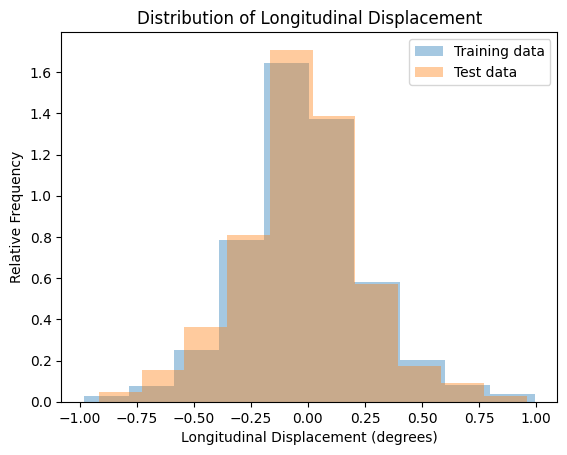

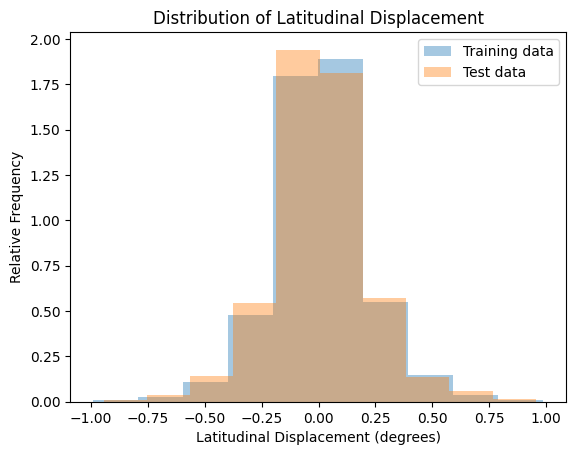

In [17]:
plt.hist(Y_train[:, 1], density=True, alpha=0.4)
plt.hist(Y_test[:, 1], density=True, alpha=0.4)
plt.title('Distribution of Longitudinal Displacement')
plt.xlabel('Longitudinal Displacement (degrees)')
plt.ylabel('Relative Frequency');
plt.legend(['Training data', 'Test data'])
# plt.xlim([-1, 1])
plt.show()

plt.hist(Y_train[:, 0], density = True, alpha=0.4)
plt.hist(Y_test[:, 0], density = True, alpha=0.4)
plt.title('Distribution of Latitudinal Displacement')
plt.xlabel('Latitudinal Displacement (degrees)')
plt.ylabel('Relative Frequency');
plt.legend(['Training data', 'Test data'])
# plt.xlim([-1, 1])
plt.show()

In [18]:
# play with regularization like dropout and batchnorm
# regularization -> lower patience

# look at distributions of train, test, validation before training

# more layers
model = nn.Sequential(
    nn.Linear(X.size()[1], 256),
    nn.LeakyReLU(),
    nn.Linear(256, 128),
    nn.Dropout(.5),
    nn.LeakyReLU(),
    nn.Linear(128, 64),
    nn.LeakyReLU(),
    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.Linear(8, 2)
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

criterion = nn.MSELoss()

# define a custom loss
# guess standard deviation and mean
# there is a likelyhood for each value : new loss function
# 1 / likelyhood(observed)

batch_size = 32
early_stopping_patience = 15
best_val_loss = float('inf')
patience_counter = 0

training_losses = []
val_losses = []

# more epochs
for epoch in range(1000):
    model.train()
    
    for i in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        x_batch = X_train[i:i+batch_size].to(device)
        y_batch = Y_train[i:i+batch_size].to(device)
        guess = model(x_batch)
        loss = criterion(guess, y_batch)
        loss.backward()
        optimizer.step()
        
    training_losses.append(loss.cpu().detach().numpy())
    print("training loss:", training_losses[-1])
    
    model.eval()
    with torch.no_grad():
        val_losses.append(criterion(model(X_val.to(device)), Y_val.to(device)).cpu().detach().numpy())
    
    # havent improved in the last 15, quit
    if val_losses[-1] < best_val_loss or epoch<150:
        best_val_loss = val_losses[-1]
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            break

training loss: 0.08205529
training loss: 0.080558546
training loss: 0.063758045
training loss: 0.053344324
training loss: 0.073442064
training loss: 0.0554731
training loss: 0.058660865
training loss: 0.065151595
training loss: 0.053420216
training loss: 0.043679025
training loss: 0.055465117
training loss: 0.045525797
training loss: 0.056859367
training loss: 0.04222524
training loss: 0.04816435
training loss: 0.046533328
training loss: 0.052482467
training loss: 0.054936588
training loss: 0.04424355
training loss: 0.03707853
training loss: 0.046840336
training loss: 0.051601045
training loss: 0.05417046
training loss: 0.054422714
training loss: 0.048068307
training loss: 0.049968477
training loss: 0.04481539
training loss: 0.03804823
training loss: 0.04929791
training loss: 0.0458159
training loss: 0.05507086
training loss: 0.047936004
training loss: 0.04918942
training loss: 0.054815795
training loss: 0.050170213
training loss: 0.052337393
training loss: 0.04258223
training loss: 0.

test loss: 0.028848687


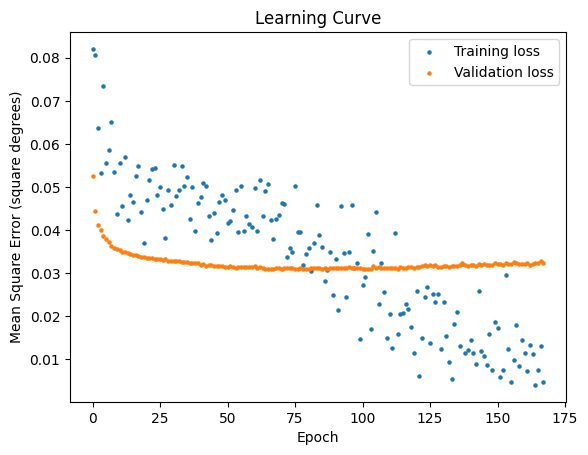

In [19]:
model.eval()
with torch.no_grad():
    print("test loss:", criterion(model(X_test.to(device)), Y_test.to(device)).cpu().detach().numpy())
    
plt.scatter(np.arange(len(training_losses)), training_losses, s=5)
plt.scatter(np.arange(len(val_losses)), val_losses, s=5)
plt.title('Learning Curve')
plt.xlabel('Epoch');
plt.ylabel('Mean Square Error (square degrees)')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

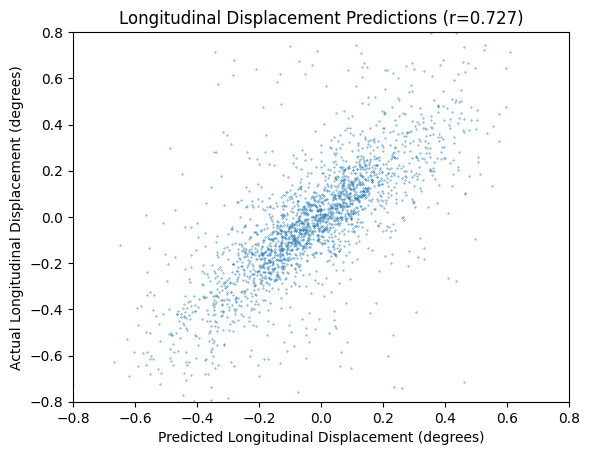

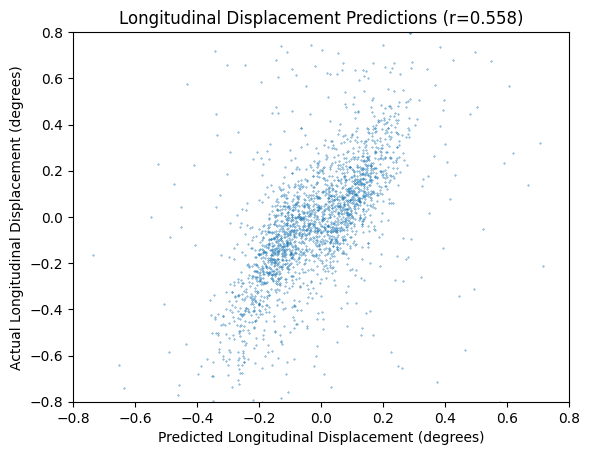

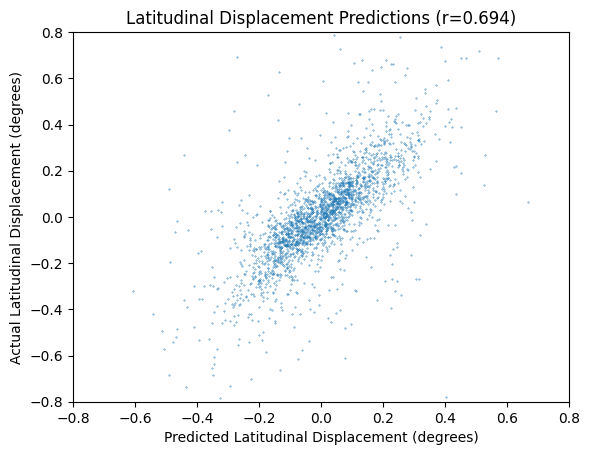

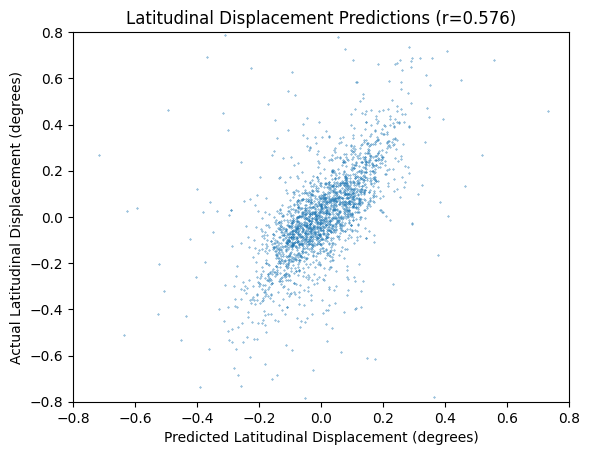

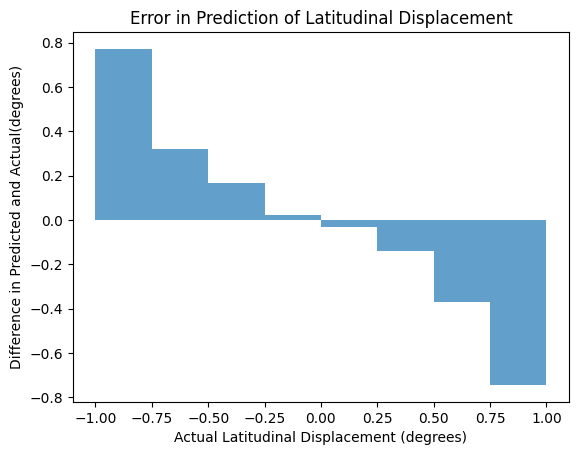

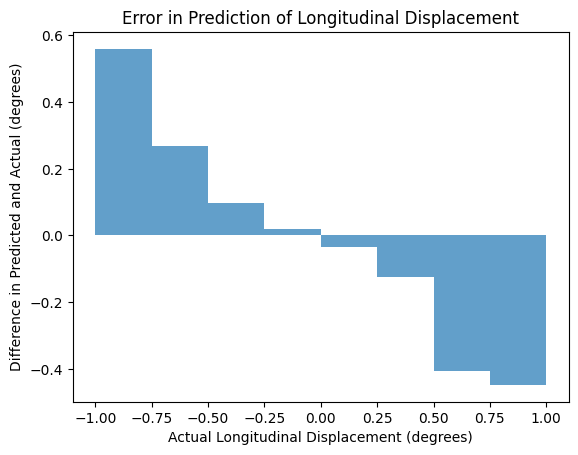

nn mean square error: 0.028848687
linear mean square error: 0.040216405
nn mad: 0.108491726
linear mad: 0.13062373


In [20]:
Y_pred = model(X_test.to(device)).cpu()

plt.scatter(Y_pred.detach().numpy()[:, 1], Y_test.detach().numpy()[:, 1], s=.1)
plt.title(f'Longitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred.detach().numpy()[:, 1], Y_test.detach().numpy()[:, 1]))/1e3})')
plt.xlabel('Predicted Longitudinal Displacement (degrees)')
plt.ylabel('Actual Longitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()

plt.scatter(Y_pred_linear[:, 1], Y_test.detach().numpy()[:, 1], s=.1)
plt.title(f'Longitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred_linear[:, 1], Y_test.detach().numpy()[:, 1]))/1e3})')
plt.xlabel('Predicted Longitudinal Displacement (degrees)')
plt.ylabel('Actual Longitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()

plt.scatter(Y_pred.detach().numpy()[:, 0], Y_test.detach().numpy()[:, 0], s=0.1)
plt.title(f'Latitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred.detach().numpy()[:, 0], Y_test.detach().numpy()[:, 0]))/1e3})')
plt.xlabel('Predicted Latitudinal Displacement (degrees)')
plt.ylabel('Actual Latitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()

plt.scatter(Y_pred_linear[:, 0], Y_test[:, 0], s=.1)
plt.title(f'Latitudinal Displacement Predictions (r={round(1e3*corr_coef(Y_pred_linear[:, 0], Y_test.detach().numpy()[:, 0]))/1e3})')
plt.xlabel('Predicted Latitudinal Displacement (degrees)')
plt.ylabel('Actual Latitudinal Displacement (degrees)')
plt.xlim([-.8, .8])
plt.ylim([-.8, .8])
plt.show()


num_bins = 8
bin_boundaries = np.linspace(-1, 1, num_bins + 1)
bin_boundaries
bins = np.digitize(Y_test.detach()[:, 0], bin_boundaries)
errors = (Y_pred.detach()[:, 0] - Y_test.detach()[:, 0]).numpy()
avg_errors = [np.mean(errors[bins == i]) for i in range(1, num_bins + 1)]
plt.bar(bin_boundaries[:-1], avg_errors, width=np.diff(bin_boundaries), align='edge', alpha=0.7)
plt.xlabel('Actual Latitudinal Displacement (degrees)')
plt.ylabel('Difference in Predicted and Actual(degrees)')
plt.title('Error in Prediction of Latitudinal Displacement')
plt.xticks(bin_boundaries)
plt.show()

bin_boundaries = np.linspace(-1, 1, num_bins + 1)
bin_boundaries
bins = np.digitize(Y_test.detach()[:, 1], bin_boundaries)
errors = (Y_pred.detach()[:, 1] - Y_test.detach()[:, 1]).numpy()
avg_errors = [np.mean(errors[bins == i]) for i in range(1, num_bins + 1)]
plt.bar(bin_boundaries[:-1], avg_errors, width=np.diff(bin_boundaries), align='edge', alpha=0.7)
plt.xlabel('Actual Longitudinal Displacement (degrees)')
plt.ylabel('Difference in Predicted and Actual (degrees)')
plt.title('Error in Prediction of Longitudinal Displacement')
plt.xticks(bin_boundaries)
plt.show()

print('nn mean square error:', np.mean((Y_pred.detach().numpy() - Y_test.detach().numpy())**2))
print('linear mean square error:', np.mean((Y_pred_linear - Y_test.detach().numpy())**2))

print('nn mad:', np.mean(np.abs(Y_pred.detach().numpy() - Y_test.detach().numpy())))
print('linear mad:', np.mean(np.abs(Y_pred_linear - Y_test.detach().numpy())))

In [ ]:
# picking a contiguous sequence
just_one = data[data.get('float') == 2902573.0].head(14)

small_test = torch.tensor(just_one[chosen_params[:-2]].to_numpy()).float().to(device)
pred = model(small_test).detach().cpu().numpy()
# pred = model.predict(small_test)
just_one = just_one.assign(pnlat = pred[:, 0] + just_one.get('lat'))
just_one = just_one.assign(pnlon = pred[:, 1] + just_one.get('lon')).reset_index()
just_one.to_csv('just_one.csv')
just_one

In [ ]:
for i in range(just_one.shape[0]):
  y_plot = [just_one.get('lat')[i], just_one.get('nlat')[i], just_one.get('pnlat')[i]]
  x_plot = [just_one.get('lon')[i], just_one.get('nlon')[i], just_one.get('pnlon')[i]]
  for j in range(3):
    plt.scatter(x_plot[j], y_plot[j])
  plt.legend(['initial', 'next position', 'predicted'])
  plt.xlim((just_one.get('lon').min()-1, just_one.get('lon').max()+1))
  plt.ylim((just_one.get('lat').min()-1, just_one.get('lat').max()+1))
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.show()

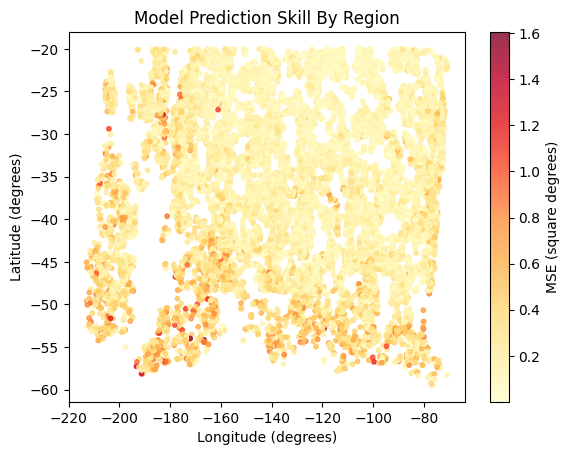

In [24]:
Y2 = final[['dy', 'dx']].to_numpy()
X2 = final.drop(columns=['dy', 'dx']).to_numpy()
X2 = torch.tensor(X2).float().to(device)
Y2 = torch.tensor(Y2).float()
preds = model(X2).cpu()
lat_errs = np.abs(preds.detach()[:, 0] - Y2.detach()[:, 0])
lon_errs = np.abs(preds.detach()[:, 1] - Y2.detach()[:, 1])
total_err = np.sqrt(lat_errs**2 + lon_errs**2)
total_err
lons = data.get('lon')
lons = [x if x < 0 else x-360 for x in lons]
lats = data.get('lat')
plt.scatter(lons, lats, c=total_err, s=10, cmap='YlOrRd', alpha=.8)
plt.title('Model Prediction Skill By Region')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.colorbar(label='MSE (square degrees)')
plt.show()

[0.15058106, 0.1532858, 0.15444079, 0.15411162]


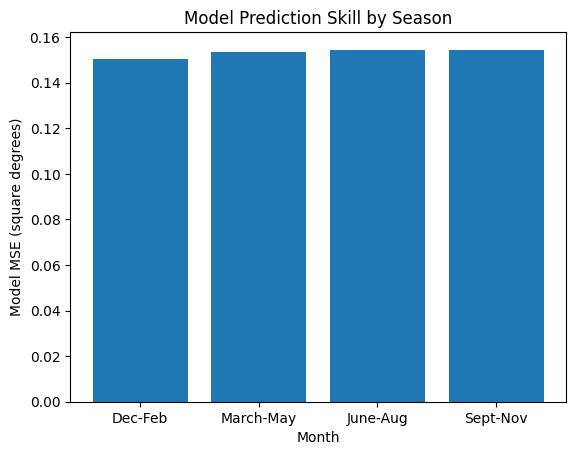

In [26]:
data = data.assign(errs=total_err)
dec_feb = data[(data.get('month') == 12) | (data.get('month') <= 2)]
march_may = data[(data.get('month') >= 3) & (data.get('month') <= 5)]
june_aug = data[(data.get('month') >= 6) & (data.get('month') <= 8)]
sept_nov = data[(data.get('month') >= 9) & (data.get('month') <= 11)]
by_season = [np.mean(dec_feb.get('errs')), np.mean(march_may.get('errs')), np.mean(june_aug.get('errs')), np.mean(sept_nov.get('errs'))]
print(by_season)
plt.bar(['Dec-Feb', 'March-May', 'June-Aug', 'Sept-Nov'], by_season)
plt.ylabel('Model MSE (square degrees)')
plt.xlabel('Month')
plt.title('Model Prediction Skill by Season')
plt.show()

In [28]:
import pickle
with open('temp2.pick', 'wb') as f:
    pickle.dump(model, f)
    
# import io

# class CPU_Unpickler(pickle.Unpickler):
#     def find_class(self, module, name):
#         if module == 'torch.storage' and name == '_load_from_bytes':
#             return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
#         else:
#             return super().find_class(module, name)

# with open('temp.pick', 'rb') as f:
#     model = CPU_Unpickler(f).load()